## 데이터 불러오고 살펴보기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns  
import matplotlib.pylab as plt

In [3]:
df = pd.read_csv('https://s3.ap-northeast-2.amazonaws.com/data10902/petition/petition.csv', parse_dates=['start', 'end'])

In [4]:
df = df.set_index('article_id')

In [5]:
df.head()

,start,end,answered,votes,category,title,content
article_id,,,,,,,
21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...
23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."
24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...
25,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."


In [6]:
df.shape

(395547, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395547 entries, 21 to 517122
Data columns (total 7 columns):
start       395547 non-null datetime64[ns]
end         395547 non-null datetime64[ns]
answered    395547 non-null int64
votes       395547 non-null int64
category    395547 non-null object
title       395547 non-null object
content     395546 non-null object
dtypes: datetime64[ns](2), int64(2), object(3)
memory usage: 24.1+ MB


In [8]:
df.describe()

,answered,votes
count,395547.000000,3.955470e+05
mean,0.000073,1.501188e+02
std,0.008562,4.802583e+03
min,0.000000,0.000000e+00
25%,0.000000,2.000000e+00
50%,0.000000,5.000000e+00
75%,0.000000,1.500000e+01
max,1.000000,1.192049e+06


In [9]:
df.describe(include=np.object)

,category,title,content
count,395547,395547,395546
unique,17,346524,375224
top,정치개혁,이명박 출국금지,이명박 출국금지
freq,62750,3018,597


In [10]:
df["category"].unique()

array(['안전/환경', '기타', '미래', '일자리', '보건복지', '정치개혁', '경제민주화', '인권/성평등',
       '외교/통일/국방', '육아/교육', '문화/예술/체육/언론', '반려동물', '교통/건축/국토', '행정',
       '농산어촌', '저출산/고령화대책', '성장동력'], dtype=object)

## 카테고리별 청원수 비교

In [11]:
df.category.value_counts()

정치개혁           62750
기타             48682
인권/성평등         34993
안전/환경          30638
교통/건축/국토       28184
외교/통일/국방       26626
육아/교육          25537
보건복지           24848
일자리            23225
행정             20268
문화/예술/체육/언론    18207
미래             18000
경제민주화          16793
성장동력            7253
반려동물            4057
저출산/고령화대책       3584
농산어촌            1902
Name: category, dtype: int64

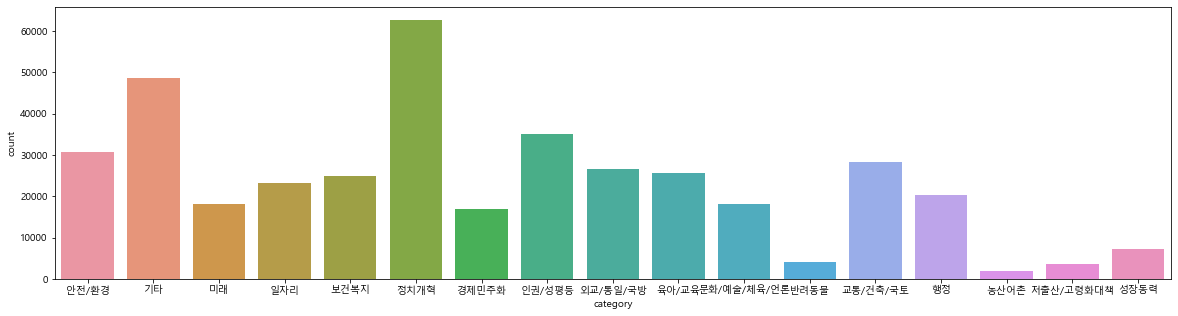

In [12]:
import matplotlib.pyplot as plt
plt.rc("font", family="Malgun Gothic")
plt.figure(figsize=(20,5))
sns.countplot(data= df, x="category")

정치/개혁에 관련된 국민 청원이 많다는 것을 알 수 있다. 

## 날짜별 청원수 비교

In [15]:
df.start.value_counts()

2017-11-11    9623
2017-09-05    5952
2018-01-11    3368
2018-02-06    2631
2017-11-09    2487
              ... 
2017-09-15      74
2017-08-22      69
2017-08-27      49
2017-08-19      39
2017-09-16       4
Name: start, Length: 535, dtype: int64

In [16]:
#청원기간 변수생성
df["term"]=df.end - df.start

In [17]:
df.term.value_counts()

30 days    384347
90 days      6754
7 days       2436
15 days      1204
60 days       806
Name: term, dtype: int64

청원기간은 30일이 가장 많고, 그 다음으로 90일, 7일 순이다.

In [19]:
df["term"]=df["term"].dt.days

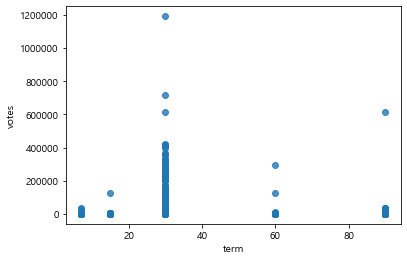

In [51]:
sns.regplot(data= df, x="term", y="votes", fit_reg=False)

기간이 길수록 투표 수가 많은 것은 아니며 청원기간이 30일일 때의 청원이 최다득표를 기록했다.

## 월별/요일별 청원수 비교

In [46]:
df["day"]=df["start"].dt.weekday

In [47]:
df["month"]=df["start"].dt.month

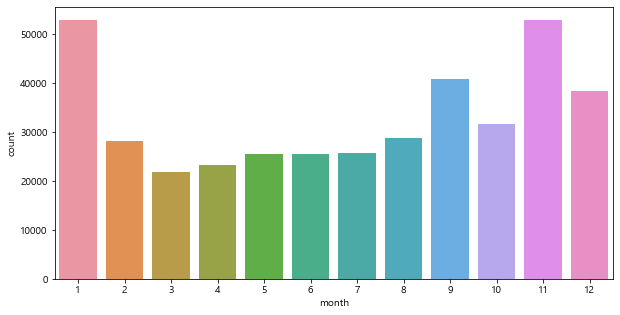

In [48]:
plt.figure(figsize=(10,5))
sns.countplot(data= df, x="month")

1월, 11월에 청원수가 가장 많았다.

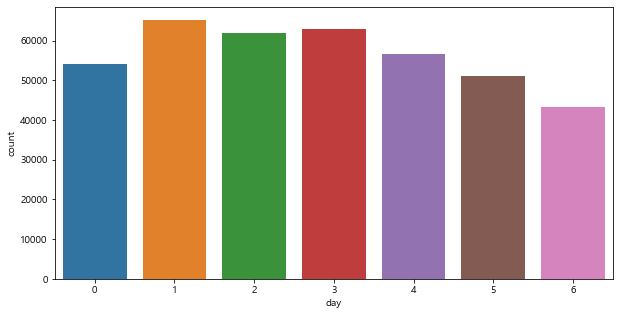

In [50]:
plt.figure(figsize=(10,5))
sns.countplot(data= df, x="day")

## 답변대상인 청원

In [25]:
df_20 = df.loc[df['votes'] > 200000]
df_20.shape

(80, 9)

In [26]:
df_20.category.value_counts()

인권/성평등         24
안전/환경          10
기타              8
정치개혁            8
문화/예술/체육/언론     7
반려동물            4
외교/통일/국방        4
보건복지            3
교통/건축/국토        3
육아/교육           3
경제민주화           2
성장동력            2
미래              1
행정              1
Name: category, dtype: int64

In [27]:
#20만건 이상 투표를 받은 청원을 별도의 컬럼을 만들어 줍니다. 컬럼 이름은 answer로 합니다.

In [28]:
df['answer'] = (df['votes'] > 200000) == 1
df['answer'] = df['answer'].astype('int')

### 답변대상 청원 카테고리의 비율

In [29]:
df.loc[(df["answer"]==0)]["category"].value_counts()

정치개혁           62742
기타             48674
인권/성평등         34969
안전/환경          30628
교통/건축/국토       28181
외교/통일/국방       26622
육아/교육          25534
보건복지           24845
일자리            23225
행정             20267
문화/예술/체육/언론    18200
미래             17999
경제민주화          16791
성장동력            7251
반려동물            4053
저출산/고령화대책       3584
농산어촌            1902
Name: category, dtype: int64

In [30]:
df.loc[(df["answer"]==1)]["category"].value_counts()

인권/성평등         24
안전/환경          10
기타              8
정치개혁            8
문화/예술/체육/언론     7
반려동물            4
외교/통일/국방        4
보건복지            3
교통/건축/국토        3
육아/교육           3
경제민주화           2
성장동력            2
미래              1
행정              1
Name: category, dtype: int64

인권/성평등 관련 청원의 경우 청원 수에 비해 답변 대상이 되는 비율이 높다.
반면 정치개혁은 청원 수에 비해 답변 대상이 되는 비율이 낮다.

### 답변 대상인 청원 중 투표를 가장 많이 받은 청원

In [32]:
answered_df = df.loc[df['answer'] == 1]
answered_df.sort_values('votes', ascending=False).head(5)

,start,end,answered,votes,category,title,content,term,month,answer
article_id,,,,,,,,,,
408609,2018-10-17,2018-11-16,0,1192049,안전/환경,강서구 피시방 살인 사건. 또 심신미약 피의자입니다.,2018년 10월 14일 엊그제 일어난 강서구 피시방 살인사건에 대한 청원입니다.\...,30,10,1
269548,2018-06-13,2018-07-13,0,714875,외교/통일/국방,"제주도 불법 난민 신청 문제에 따른 난민법, 무사증 입국, 난민신청허가 폐지/개헌 ...",2012년 난민법 제정으로 인해 외국인은 한달 무비자로 입국할 수 있으나 난민신청자...,30,6,1
10949,2017-09-06,2017-12-05,1,615354,미래,조두순 출소반대,제발 조두순 재심다시해서 무기징역으로 해야됩니다!!!,90,9,1
142600,2018-02-19,2018-03-21,1,614127,문화/예술/체육/언론,"김보름, 박지우 선수의 자격박탈과 적폐 빙상연맹의 엄중 처벌을 청원합니다","오늘 여자 단체전 팀추월에서 김보름, 박지우 선수는 팀전인데도 불구하고 개인의 영달...",30,2,1
230552,2018-05-11,2018-06-10,1,419006,인권/성평등,여성도 대한민국 국민입니다. 성별 관계없는 국가의 보호를 요청합니다.,최근 홍대 누드크로키 모델의 불법촬영 사건이 있었습니다.\n사건은 굉장히 빠르게 처...,30,5,1


### 답변 대상인 청원 중 답변을 받지 못한 청원

In [33]:
df['answer_diff'] = df['answer']-df['answered']
df['answer_diff'].sum()

51

In [58]:
unanswered_df=df.loc[(df["answer_diff"]==1)]

In [63]:
unanswered_df.head()

,start,end,answered,votes,category,title,content,term,month,answer,answer_diff,day
article_id,,,,,,,,,,,,
164255,2018-03-12,2018-04-11,0,216886,기타,GMO완전표시제 시행을 촉구합니다!,우리나라는 안전성 논란이 계속되고 있는 식용 GMO를 연간 200만 톤 이상 수입합...,30,3,1,1,0
165796,2018-03-13,2018-04-12,0,304320,정치개혁,국민들은 정부 개헌안을 지지합니다. 정부의 개헌을 꼭 실현시켜 주십시오.,공약은 중요한 것입니다.\n국민과의 약속입니다.\n대통령님은 공약을 이행해주십시오....,30,3,1,1,1
173355,2018-03-23,2018-04-22,0,209494,안전/환경,위장•몰래카메라 판매금지와 몰카범죄 처벌을 강화해주세요.,2012년 전국의 몰카범죄는 2400건 2015년에 들어 3배 이상 증가해 무려 7...,30,3,1,1,4
174292,2018-03-24,2018-04-23,0,278128,안전/환경,미세먼지의 위험 그리고 오염 및 중국에대한 항의,미세먼지가 10년전에 비해 상당히 자주 몰려오고있습니다.\n언론에서도 중국발이라고 ...,30,3,1,1,5
178781,2018-03-28,2018-04-27,0,215036,안전/환경,세월호 관련 청문회 위증한 조여옥대위 징계바랍니다.,세월호 관련해서 그 동안 거짓으로 감추고 숨겨왔던 사실들이 조금씩 드러나고 있습니다...,30,3,1,1,2


In [60]:
unanswered_df["category"].value_counts()

인권/성평등         15
안전/환경           8
기타              7
정치개혁            6
반려동물            4
외교/통일/국방        3
문화/예술/체육/언론     3
육아/교육           2
교통/건축/국토        1
보건복지            1
경제민주화           1
Name: category, dtype: int64

In [61]:
df.loc[(df["answer_diff"]==0)]["category"].value_counts()

정치개혁           62744
기타             48675
인권/성평등         34978
안전/환경          30630
교통/건축/국토       28183
외교/통일/국방       26623
육아/교육          25535
보건복지           24847
일자리            23225
행정             20268
문화/예술/체육/언론    18204
미래             18000
경제민주화          16792
성장동력            7253
반려동물            4053
저출산/고령화대책       3584
농산어촌            1902
Name: category, dtype: int64

인권/성평등 관련 청원에 대해 국민들이 많이 공감하고 있지만 실제로 답변을 받는 비율이 낮다는 것을 알 수 있다.

### 답변을 받지 못한 청원 중 투표를 많이 받은 청원

In [62]:
unanswered_df.sort_values('votes', ascending=False).head(5)

,start,end,answered,votes,category,title,content,term,month,answer,answer_diff,day
article_id,,,,,,,,,,,,
408609,2018-10-17,2018-11-16,0,1192049,안전/환경,강서구 피시방 살인 사건. 또 심신미약 피의자입니다.,2018년 10월 14일 엊그제 일어난 강서구 피시방 살인사건에 대한 청원입니다.\...,30,10,1,1,2
269548,2018-06-13,2018-07-13,0,714875,외교/통일/국방,"제주도 불법 난민 신청 문제에 따른 난민법, 무사증 입국, 난민신청허가 폐지/개헌 ...",2012년 난민법 제정으로 인해 외국인은 한달 무비자로 입국할 수 있으나 난민신청자...,30,6,1,1,2
426834,2018-10-31,2018-11-30,0,416093,인권/성평등,"132cm, 31kg의 왜소한 50대 여성이 180cm가 넘는 건장한 20세 남성에...",http://m.news1.kr/articles/?3464603\n관련 기사입니다....,30,10,1,1,2
314584,2018-07-22,2018-08-21,0,413924,육아/교육,23개월 아기가 폭행에 장이 끊어져 죽었습니다.,고생하시는 청와대 관계자 및 대통령님.\n이 글을 꼭 한번만 읽어주세요.\n너무나 ...,30,7,1,1,6
437737,2018-11-09,2018-12-09,0,397079,인권/성평등,억울하게 떠나신 저의 아버지의 원한을 풀어주세요,46일동안 눈 한번 뜨시지 못한 채 11월 6일 새벽 4시에 저의 아버지가 억울하게...,30,11,1,1,4
